In [2]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


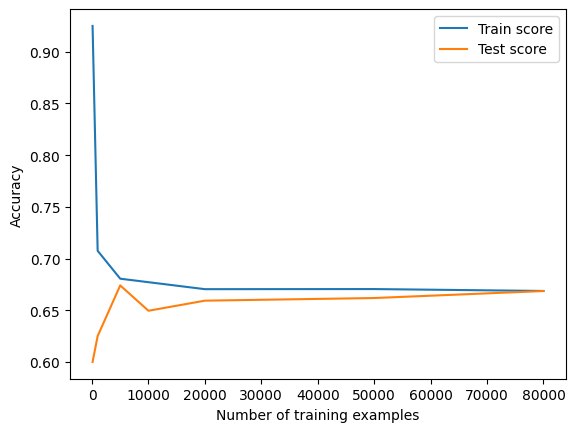

In [4]:
import pandas as pd
from fuzzywuzzy import fuzz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Read in the training data from train.csv, using only a sample of 100,000 rows
train_data = pd.read_csv('train.csv', nrows=100000)

# Define a function to calculate the similarity between two strings using fuzzywuzzy
def similarity(question1, question2):
    return fuzz.token_sort_ratio(question1, question2)

# Calculate the similarity between the question pairs
train_data['similarity'] = train_data.apply(lambda x: similarity(x['question1'], x['question2']), axis=1)

# Define the labels for the data
y = train_data['is_duplicate']

# Initialize an empty list to store the train and test scores
train_scores = []
test_scores = []

# Define a list of different subset sizes to use for training the model
subset_sizes = [100, 1000, 5000, 10000, 20000, 50000, 80000]

# Train a random forest classifier on different subsets of the training data
for subset_size in subset_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(train_data['similarity'][:subset_size], y[:subset_size], test_size=0.2, random_state=42)

    # Train a random forest classifier on the training data
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train.values.reshape(-1, 1), y_train)

    # Calculate the train and test scores
    train_score = rf.score(X_train.values.reshape(-1, 1), y_train)
    test_score = rf.score(X_test.values.reshape(-1, 1), y_test)

    # Append the train and test scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the train and test scores against the number of training examples
plt.plot(subset_sizes, train_scores, label='Train score')
plt.plot(subset_sizes, test_scores, label='Test score')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
import pandas as pd
from fuzzywuzzy import fuzz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read in the training data from train.csv, using only a sample of 100,000 rows
train_data = pd.read_csv('train.csv', nrows=100000)

# Define a function to calculate the similarity between two strings using fuzzywuzzy
def similarity(question1, question2):
    return fuzz.token_sort_ratio(question1, question2)

# Calculate the similarity between the question pairs
train_data['similarity'] = train_data.apply(lambda x: similarity(x['question1'], x['question2']), axis=1)

# Define the labels for the data
y = train_data['is_duplicate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data['similarity'], y, test_size=0.2, random_state=42)

# Train a random forest classifier on the training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions for the testing data
y_pred = rf.predict(X_test.values.reshape(-1, 1))

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


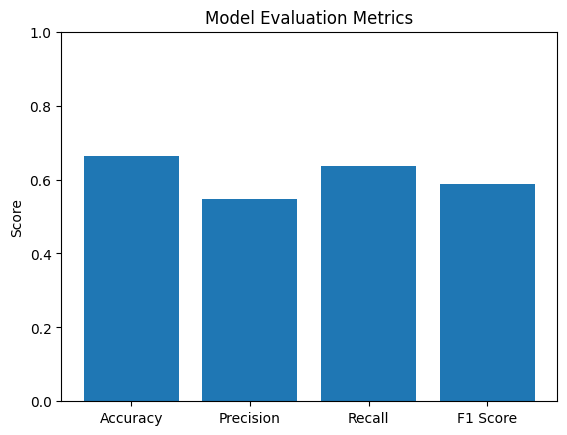

In [14]:
# Define the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(metrics, scores)
ax.set_ylabel('Score')
ax.set_ylim([0, 1])
ax.set_title('Model Evaluation Metrics')
plt.show()

In [15]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.66485
Precision: 0.5480077634433155
Recall: 0.6362672322375398
F1-score: 0.5888486781573943


Epoch: 1 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
Epoch: 2 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
Epoch: 3 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
Epoch: 4 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
Epoch: 5 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
Epoch: 6 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
Epoch: 7 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
Epoch: 8 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
Epoch: 9 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
Epoch: 10 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
Epoch: 11 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
Epoch: 12 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
Epoch: 13 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
Epoch: 14 Train Score: 0.6669006158945312 Test Score: 0.665883400529323
E

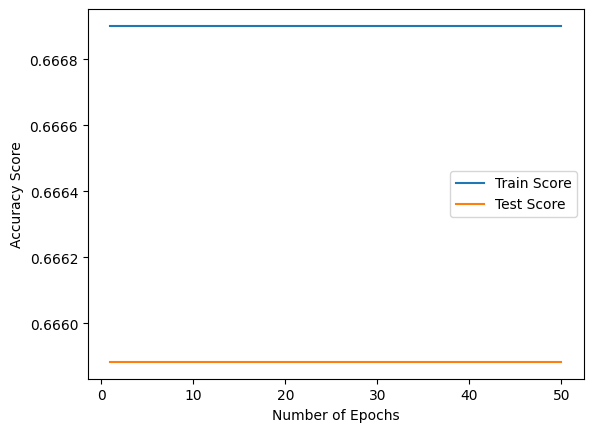

In [16]:
import pandas as pd
from fuzzywuzzy import fuzz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('train.csv')

# Create a function to calculate the similarity between two questions using fuzzywuzzy
def similarity(row):
    return fuzz.token_sort_ratio(row['question1'], row['question2'])

# Calculate the similarity score for each question pair
df['similarity'] = df.apply(similarity, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['similarity'], df['is_duplicate'], test_size=0.2, random_state=42)

# Initialize an empty list to store the train and test scores
train_scores = []
test_scores = []

# Train the model with different numbers of epochs
for epoch in range(1, 51):
    # Train a random forest classifier on the training data
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train.values.reshape(-1, 1), y_train)

    # Calculate the train and test scores
    train_score = accuracy_score(y_train, rf.predict(X_train.values.reshape(-1, 1)))
    test_score = accuracy_score(y_test, rf.predict(X_test.values.reshape(-1, 1)))

    # Append the train and test scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print('Epoch:', epoch, 'Train Score:', train_score, 'Test Score:', test_score)

# Plot the train and test scores against the number of epochs
plt.plot(range(1, 51), train_scores, label='Train Score')
plt.plot(range(1, 51), test_scores, label='Test Score')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

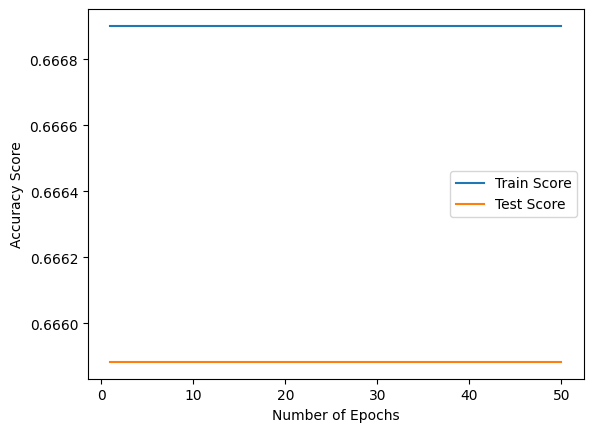

In [17]:
# Plot the train and test scores against the number of epochs
plt.plot(range(1, 51), train_scores, label='Train Score')
plt.plot(range(1, 51), test_scores, label='Test Score')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()